In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

import tweepy
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

%matplotlib inline

plt.style.use('fivethirtyeight')

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config_Twitteraarash19 import consumer_key, consumer_secret,access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
newsOutlets = ("BBC" , "CBS", "CNN", "FoxNews", "nytimes")

oldestTweet = None
uniqueIDs = []
accountList = []
compoundList = []
positiveList = []
negativeList = []
neutralList = []
tweetTimes = []
tweetText = []
tweetAgo = []
            
for newsOutlet in newsOutlets:
    
    counter = 0
    
    for x in range(1, 6):
        
        publicTweets = api.user_timeline(newsOutlet, page=x, result_type="recent", max_ID=oldestTweet)
       
        for tweet in publicTweets:
            
            results = analyzer.polarity_scores(tweet["text"])
            
            compound = results["compound"]
            positive = results["pos"]
            negative = results["neg"]
            neutral = results["neu"]
            
            compoundList.append(compound)
            positiveList.append(positive)
            negativeList.append(negative)
            neutralList.append(neutral)
            
            account = tweet["user"]["name"]
            time = tweet["created_at"]
            text = tweet["text"]
            
            accountList.append(account)
            tweetTimes.append(time)
            tweetText.append(text)
            
            tweetID = tweet["id"]
            if tweetID not in uniqueIDs:
                uniqueIDs.append(tweetID)
            
            oldestTweet = tweetID-1
            
            counter += 1
            tweetAgo.append(counter)
            
            newsOutletResults = {"News Outlet": accountList,
                                 "Tweet Text": tweetText,
                                 "Tweet Time": tweetTimes,
                                 "Compound Score": compoundList,
                                 "Positive Score": positiveList,
                                 "Neutral Score": neutralList,
                                 "Negative Score": negativeList,
                                 "Tweets Ago": tweetAgo} 
            
newsMood_df = pd.DataFrame(newsOutletResults)
newsMood_df.head()

# newsMoodDF.to_csv("Output Files/News Mood DataFrame.csv")

,Compound Score,Negative Score,Neutral Score,News Outlet,Positive Score,Tweet Text,Tweet Time,Tweets Ago
0,-0.0772,0.162,0.694,BBC,0.145,Jaco has autism. His dad worries about how he’...,Tue Nov 13 19:04:05 +0000 2018,1
1,-0.2500,0.210,0.616,BBC,0.174,The EU is to allow farmers to receive full com...,Tue Nov 13 18:05:04 +0000 2018,2
2,0.0000,0.000,1.000,BBC,0.000,😂🐱 Ian McKellen explains how he gets in touch ...,Tue Nov 13 17:04:04 +0000 2018,3
3,0.4215,0.000,0.891,BBC,0.109,RT @BBCR1: Remember that time @Harry_Styles wa...,Tue Nov 13 16:46:02 +0000 2018,4
4,0.3367,0.000,0.893,BBC,0.107,RT @BBCCiN: What was that really important thi...,Tue Nov 13 14:55:15 +0000 2018,5


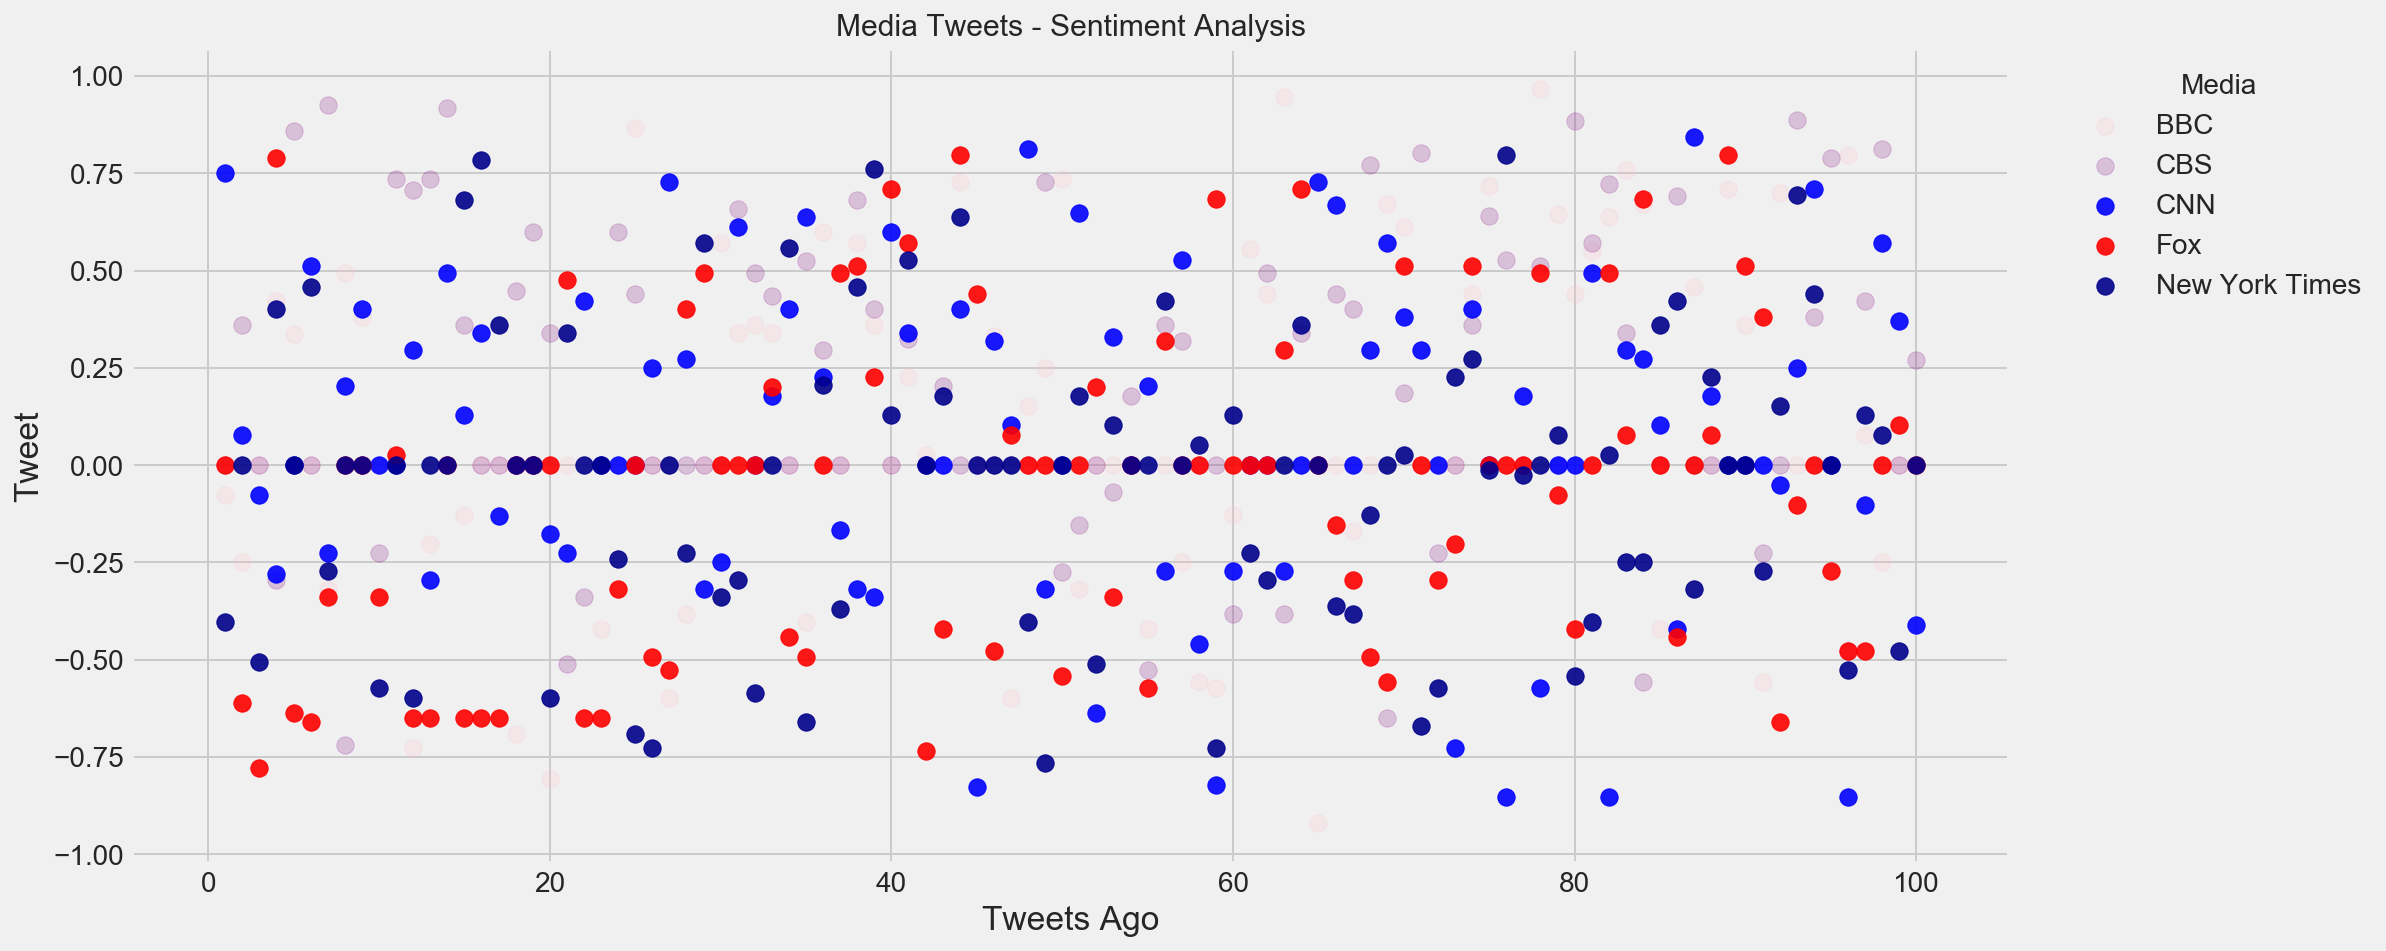

In [22]:
bbc_df = newsMood_df.loc[newsMood_df["News Outlet"]== "BBC"]
cbs_df = newsMood_df.loc[newsMood_df["News Outlet"]== "CBS"]
cnn_df = newsMood_df.loc[newsMood_df["News Outlet"]== "CNN"]
fox_df = newsMood_df.loc[newsMood_df["News Outlet"]== "Fox News"]
nyt_df = newsMood_df.loc[newsMood_df["News Outlet"]== "The New York Times"]

fig = plt.figure(figsize=(15, 7))
plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound Score"], s=75, facecolors="pink", alpha=0.2, label="BBC")
plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound Score"], s=75, facecolors="purple", alpha=0.2, label="CBS")
plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound Score"], s=75, facecolors="blue", alpha=0.9, label="CNN")
plt.scatter(fox_df["Tweets Ago"], fox_df["Compound Score"], s=75, facecolors="red", alpha=0.9, label="Fox")
plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound Score"], s=75, facecolors="darkblue", alpha=0.9, label="New York Times")

plt.legend(title= "Media", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Media Tweets - Sentiment Analysis", fontsize=15)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet")

plt.show()